# **KMeans** Clustering
1. https://scikit-learn.org/stable/modules/clustering.html#k-means


### Centroid Initialization Methods
```
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
```

### Mini Batch KMeans
Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory
```
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)
```

### Finding the Optimal Number of Clusters
- Elbow Rule

- Silhouette Score
```
silhouette_score(X, kmeans.labels_, metric='euclidean')
```

### Visual the Silhouette
```
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
```

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)

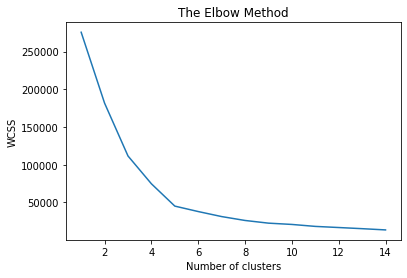

In [ ]:
# Number of cluster choosing
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


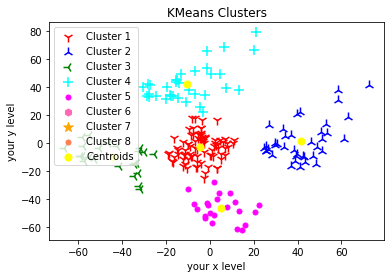

In [ ]:
# Now trained your model
clustering = KMeans()
params = {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 
          'n_clusters': 5, 'n_init': 10, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}
clustering.set_params(**params)
clustering.fit(X)

# Make Predict
y_pred = clustering.predict(X)
print(y_pred)

# Visualising the KMeans clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='+')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', marker='.')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 50, c = 'hotpink', label = 'Cluster 6', marker='h')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'orange', label = 'Cluster 7', marker='*')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'coral', label = 'Cluster 8', marker='.')
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters')
plt.xlabel('your x level')
plt.ylabel('your y level')
plt.legend()
plt.show()

# Grid search with KMeans 

In [ ]:
pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=50)),
 ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

# **Hierarchical** clustering
1. https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

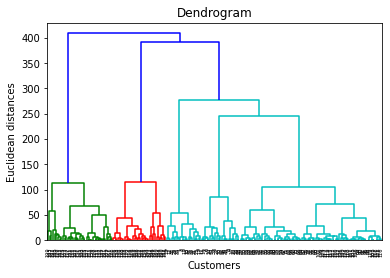

In [ ]:
# Number of cluster choosing
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


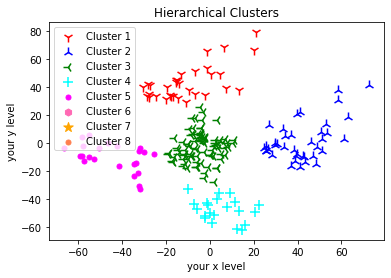

In [ ]:
# Now trained your model
clustering = AgglomerativeClustering()
params = {'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 
          'distance_threshold': None, 'linkage': 'ward', 'memory': None, 'n_clusters': 5}
clustering.set_params(**params)

# Make predict
y_pred = clustering.fit_predict(X)
print(y_pred)

# Visualising the Hierarchical clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='+')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', marker='.')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 50, c = 'hotpink', label = 'Cluster 6', marker='h')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'orange', label = 'Cluster 7', marker='*')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'coral', label = 'Cluster 8', marker='.')
plt.title('Hierarchical Clusters')
plt.xlabel('your x level')
plt.ylabel('your y level')
plt.legend()
plt.show()

# Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
model = = GaussianMixture(n_components=3, n_init=10)
model.fit(X)
yhat = model.predict(X)
print(yhat)

print(model.predict_proba(X))
print(model.weights_)
print(model.weights_)
print(model.covariances_)

# Bayesian Gaussian Mixture

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)  
# BayesianGaussianMixture(n_components = 5, covariance_type ='full')  (n_components = 5, covariance_type ='diag')
bgm.fit(X)
np.round(bgm.weights_, 2)

# Affinity Propagation Model
- preference
- damping

[ 2  0  1  0  2  0  1  3  1  0  1  3  1  0  1  0  2  0  2  3  2  0  1  0
  1  3  2  0  2  3  1  0  1  3  1  3  2  0  2  0  2  3  2  4  2  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  4  4  4  5
  5  4  5  6  6  5  6  5  5  6  5  5  6  5  6  6  6  5  5  5  5  5  5  6
  5  6  5  6  5  5  6  6  6  5  5  5  5  5  5  6  5  6  6  6  5  6  5  6
  6  5  6  7  9  8  9  7 10  8 10  8  9  8 10  7 10  8 10  8 10  7  9  7
 10  7  9  8  9  7 10  7 10  8 10  7 10  8 10  8  9  7 10  7  9  8 10  7
  9  8 10  8 10  7 10  7 10  8 10 11  9 11 10 11  9 11 12 11 12 11 12 11
 12 11 12 11 12 11 12 11]


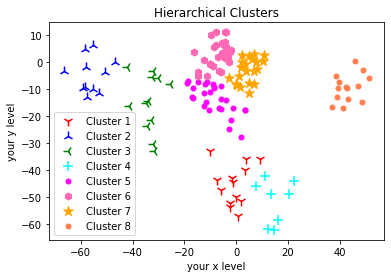

In [ ]:
clustering = AffinityPropagation()
params = {'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 200, 
          'preference': None, 'random_state': 5, 'verbose': False}
clustering.set_params(**params)
clustering.fit(X)

# Make predict
y_pred = clustering.fit_predict(X)
print(y_pred)

# Visualising the Affinity Propagation clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='+')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', marker='.')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 50, c = 'hotpink', label = 'Cluster 6', marker='h')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'orange', label = 'Cluster 7', marker='*')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'coral', label = 'Cluster 8', marker='.')
plt.title('AffinityPropagation Clusters')
plt.xlabel('your x level')
plt.ylabel('your y level')
plt.legend()
plt.show()

# DBSCAN Model

[ 0 -1 -1  1  0  1  2  3 -1 -1  2  3  4  5  4  5 -1 -1 -1 -1 -1  6 -1  6
 -1 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1  8 -1  8 -1 -1 -1  8 -1  9  9
 10 10  9 -1 11 11 12 13 12 13 14 12 12 -1 12 14 12 15 12 12 15 12 12 12
 12 12 16 17 -1 16 17 16 16 17 -1 16 -1 16 -1 18 18 19 19 19 19 19 19 20
 19 20 19 20 19 19 20 20 20 19 19 19 21 19 19 20 19 20 20 20 21 20 22 20
 23 22 23 -1 24 -1 24 -1 25 26 25 26 -1 26 -1 -1 25 26 -1 26 -1 -1 -1 27
 28 -1 -1 29 -1 30 28 27 28 29 28 30 31 -1 31 29 -1 27 -1 -1 -1 32 -1 -1
 -1 -1 33 32 33 -1 33 -1 33 -1 -1 -1 -1 34 -1 34 -1 -1 -1 35 -1 -1 -1 35
 -1 -1 -1 -1 -1 -1 -1 -1]


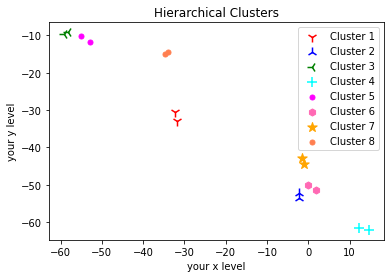

In [ ]:
clustering = DBSCAN()
params = {'algorithm': 'auto', 'eps': 3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 
          'min_samples': 2, 'n_jobs': None, 'p': None}
clustering.set_params(**params)
clustering.fit(X)

# Make predict
y_pred = clustering.fit_predict(X)
print(y_pred)

# Visualising the DBSCAN clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='+')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', marker='.')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 50, c = 'hotpink', label = 'Cluster 6', marker='h')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'orange', label = 'Cluster 7', marker='*')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'coral', label = 'Cluster 8', marker='.')
plt.title('Hierarchical Clusters')
plt.xlabel('your x level')
plt.ylabel('your y level')
plt.legend()
plt.show()

# OPTICS Model
1. https://scikit-learn.org/stable/modules/clustering.html#optics

[ 0 -1 -1 40  0 40 47 43 -1 38 47 43 48 39 48 39  1 38 -1 43  1 37 46 37
 45 41  2 -1  2 41 46 36 46 42 45 41 45 36  3 36  3 42  3 27  3 -1  8  8
  9  9  8 27 10 10 -1  4  7  4 11  5  7 -1  6 11  6 26  7  5 26  7  7  5
 -1 -1 12 14 -1 13 14 12 13 14 -1 12 -1 12 14 19 19 -1 20 20 20 23 20 15
 20 15 23 15 21 21 15 17 15 21 22 22 25 22 21 17 22 16 16 16 25 16 24 16
 18 24 18 -1 28 -1 28 -1 31 50 31 50 28 -1 31 -1 31 -1 30 -1 32 -1 -1 52
 30 -1 29 51 30 53 30 52 30 51 30 53 32 51 32 51 29 52 -1 -1 35 56 35 54
 35 -1 33 56 33 54 33 54 33 56 33 55 44 55 34 55 44 -1 34 58 34 -1 34 58
 49 -1 49 57 -1 57 -1 58]


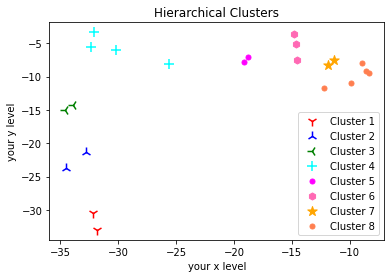

In [ ]:
clustering = OPTICS()
params = {'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': np.inf, 
          'memory': None, 'metric': 'minkowski', 'metric_params': None, 'min_cluster_size': None, 
          'min_samples': 2, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.05}
clustering.set_params(**params)
clustering.fit(X)

# Make predict
y_pred = clustering.fit_predict(X)
print(y_pred)

# Visualising the OPTICS clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='+')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', marker='.')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 50, c = 'hotpink', label = 'Cluster 6', marker='h')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'orange', label = 'Cluster 7', marker='*')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'coral', label = 'Cluster 8', marker='.')
plt.title('Hierarchical Clusters')
plt.xlabel('your x level')
plt.ylabel('your y level')
plt.legend()
plt.show()

# Spectral clustering
1. https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 1 2 1 1 4 1 4 2]


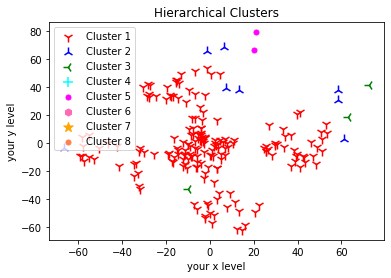

In [ ]:
clustering = SpectralClustering()
params = {'affinity': 'rbf', 'assign_labels': 'discretize', 'coef0': 1, 'degree': 3, 'eigen_solver': None, 
          'eigen_tol': 0.0, 'gamma': 1.0, 'kernel_params': None, 'n_clusters': 5, 'n_components': None, 
          'n_init': 10, 'n_jobs': None, 'n_neighbors': 10, 'random_state': 0, 'verbose': False}
clustering.set_params(**params)
clustering.fit(X)

# Make predict
y_pred = clustering.fit_predict(X)
print(y_pred)

# Visualising the OPTICS clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='+')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', marker='.')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 50, c = 'hotpink', label = 'Cluster 6', marker='h')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'orange', label = 'Cluster 7', marker='*')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'coral', label = 'Cluster 8', marker='.')
plt.title('Hierarchical Clusters')
plt.xlabel('your x level')
plt.ylabel('your y level')
plt.legend()
plt.show()